# 1. Conexión API

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium


#enviorement: nosql3.8

api_key="cfb0e81f9edc5ff91586f4672ba286fb"

# base_url=f"https://api.openweathermap.org/data/2.5/weather?q=Madrid&units=metric&appid={api_key}"

# response=(requests.get(base_url, params={"api_key":api_key})).json()

base_url=f"https://api.openweathermap.org/data/2.5/weather?q=Sudafrica&units=metric"

response1=(requests.get(base_url, params={"appid":api_key})).json()

df=pd.json_normalize(response1)

df.head()

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.country,sys.sunrise,sys.sunset
0,"[{'id': 802, 'main': 'Clouds', 'description': ...",stations,10000,1764692280,7200,953987,Republic of South Africa,200,26,-30,...,41,1008,846,5.15,119,6.6,44,ZA,1764644849,1764695024


City name

Temperature (°C)

Humidity (%)

Wind speed (m/s or km/h)

Weather description (e.g., “clear sky”)

In [8]:
registro=df[['name','main.temp', 'main.humidity','wind.speed', 'sys.sunrise']]
registro

,name,main.temp,main.humidity,wind.speed,sys.sunrise
0,Republic of South Africa,21.49,41,5.15,1764644849


# 2. Recopilación de datos y 3. Limpieza de datos

Crea una lista de al menos 20 ciudades de diferentes continentes.

Utilice un bucle de Python para solicitar datos de cada ciudad y almacenar los resultados.

Construya un DataFrame de pandas con una fila por ciudad.

In [9]:
paises_por_continente = [
    "Egipto",
    "Nigeria",
    "Sudafrica",
    "Canadá",
    "Brasil",
    "México",
    "Argentina",
    "Japon",
    "India",
    "China",
    "Tailandia",
    "Francia",
    "Alemania",
    "España",
    "Colombia",
    "Francia",
    "Francia",
    "Islandia",
    "Rusia",
    "Peru"
]

resultado=[]

for i in paises_por_continente:

    base_urli=f"https://api.openweathermap.org/data/2.5/weather?q={i}&units=metric&appid={api_key}"

    response=(requests.get(base_urli, params={"appid":api_key})).json()

    print(response)

    df_fila=pd.json_normalize(response)

    df_fila=df_fila[['name','main.temp', 'main.humidity','wind.speed', 'sys.sunrise']]

    resultado.append(df_fila)

df_final=pd.concat(resultado, ignore_index=True)
df_final

{'coord': {'lon': 30, 'lat': 27}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.75, 'feels_like': 16.7, 'temp_min': 17.75, 'temp_max': 17.75, 'pressure': 1017, 'humidity': 43, 'sea_level': 1017, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 4.78, 'deg': 359, 'gust': 6.03}, 'clouds': {'all': 80}, 'dt': 1764692404, 'sys': {'country': 'EG', 'sunrise': 1764649977, 'sunset': 1764687976}, 'timezone': 7200, 'id': 357994, 'name': 'Egypt', 'cod': 200}
{'coord': {'lon': 8, 'lat': 10}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.26, 'feels_like': 30.28, 'temp_min': 32.26, 'temp_max': 32.26, 'pressure': 1005, 'humidity': 21, 'sea_level': 1005, 'grnd_level': 922}, 'visibility': 10000, 'wind': {'speed': 0.87, 'deg': 328, 'gust': 0.9}, 'clouds': {'all': 98}, 'dt': 1764692460, 'sys': {'country': 'NG', 'sunrise': 17646

,name,main.temp,main.humidity,wind.speed,sys.sunrise
0,Egypt,17.75,43,4.78,1764649977
1,Nigeria,32.26,21,0.87,1764653418
2,Republic of South Africa,21.49,41,5.15,1764644849
3,Canadá,32.97,35,2.20,1764662853
4,Brazil,25.20,82,0.24,1764666582
5,Mexico City,18.86,48,0.00,1764680113
6,Argentina,28.11,32,2.27,1764665876
7,Japan,13.00,88,2.06,1764711238
8,Innichen,0.00,93,0.51,1764657379
9,China,10.05,61,5.44,1764680851


In [10]:
df_final.to_csv('PaisesTempetaura.csv')

In [11]:
df_final=pd.read_csv("../Api/PaisesTempetaura.csv")

In [12]:
df_final=df_final.drop(columns='Unnamed: 0')


In [13]:
df_final.columns

Index(['name', 'main.temp', 'main.humidity', 'wind.speed', 'sys.sunrise'], dtype='object')

In [14]:
df_final.head()

,name,main.temp,main.humidity,wind.speed,sys.sunrise
0,Egypt,17.75,43,4.78,1764649977
1,Nigeria,32.26,21,0.87,1764653418
2,Republic of South Africa,21.49,41,5.15,1764644849
3,Canadá,32.97,35,2.20,1764662853
4,Brazil,25.20,82,0.24,1764666582


# 4. Data Analysis

Answer questions such as:
Which cities are the hottest and coldest right now?


In [15]:
max=df_final["name"][df_final["main.temp"] == df_final["main.temp"].max()] ## hay que hacer un .item() para coger solo para un elemento
min=df_final["name"][df_final["main.temp"] == df_final["main.temp"].min()]


In [16]:
print(f'El pais mas caliente que es: {max.item()} y el pais mas frio es: {min.item()}')

El pais mas caliente que es: Canadá y el pais mas frio es: Russia


Is there a relationship between temperature and humidity?

In [17]:
## Acordarse si se usa f "" al usar los valores dentro se usa ' '
print(f"La relacion que hay que hay entre temperatura y humedad es {abs(df_final['main.temp'].corr(df_final['main.humidity']).round(4))}")

La relacion que hay que hay entre temperatura y humedad es 0.6246


Which continent seems to have the windiest cities?

In [18]:
paises_africa = [
    "Egipto",
    "Nigeria",
    "Sudafrica"
]

paises_america = [
    "Canadá",
    "México",
    "Colombia",
    "Peru",
    "Brasil",
    "Argentina"
]

paises_asia = [
    "Japon",
    "India",
    "China",
    "Tailandia"
]

paises_europa = [
    "Francia",
    "Alemania",
    "España",
    "Bielorrusia",
    "Islandia"
    ]

total=[paises_africa,paises_america,paises_asia,paises_europa]

resultadoTotal=[]
for paises in total:

    df1= df_final[df_final['name'].isin(paises)]
    max_aire=df1["name"][df1["wind.speed"] == df1["wind.speed"].max()]
    resultadoTotal.append(max_aire.item())

print(f'Los paises con más viento son: {resultadoTotal[0]}, {resultadoTotal[1]}, {resultadoTotal[2]} y {resultadoTotal[3]}')

Los paises con más viento son: Nigeria, Colombia, China y Islandia


What’s the most common weather description (e.g., clear, cloudy, rainy)?

In [19]:
df_final.columns

Index(['name', 'main.temp', 'main.humidity', 'wind.speed', 'sys.sunrise'], dtype='object')

In [20]:
# final=df_final.groupby('sys.sunrise')['name']
final=df_final.groupby('name')['main.temp']
# final
print(final)

In [21]:
rango = [-25,-15,0,10,20,30,40]
etiqueta= ["<-25", "-25/-10", "0-10", "10-20", "20-30", ">30"]

df_final['rango.temperatura'] = pd.cut(
    df_final['main.temp'],
    bins=rango,
    labels=etiqueta,
    right=False
)

df_final['rango.temperatura'].value_counts()

rango.temperatura
20-30      9
10-20      4
0-10       3
-25/-10    2
>30        2
<-25       0
Name: count, dtype: int64

In [22]:
print(f'La el rango de temperatura mas comun es: {df_final["rango.temperatura"].value_counts().index[0]}')

La el rango de temperatura mas comun es: 20-30


Example 1: Bar chart of average temperature by continent.

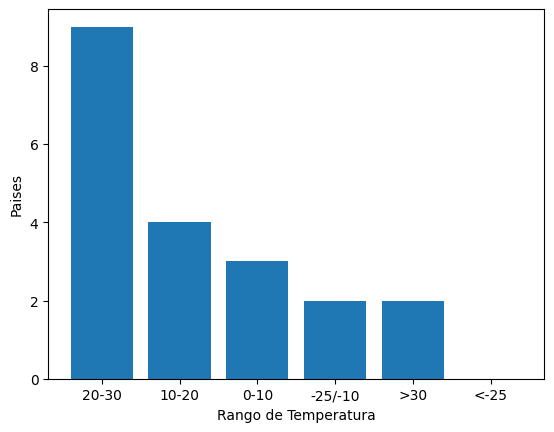

In [23]:
varianza = df_final["rango.temperatura"].value_counts()
plt.bar(varianza.index, varianza.values)
plt.xlabel("Rango de Temperatura")
plt.ylabel("Paises")
plt.show()

Example 2: Scatter plot of temperature vs humidity.

In [24]:
df_final.columns

Index(['name', 'main.temp', 'main.humidity', 'wind.speed', 'sys.sunrise',
       'rango.temperatura'],
      dtype='object')

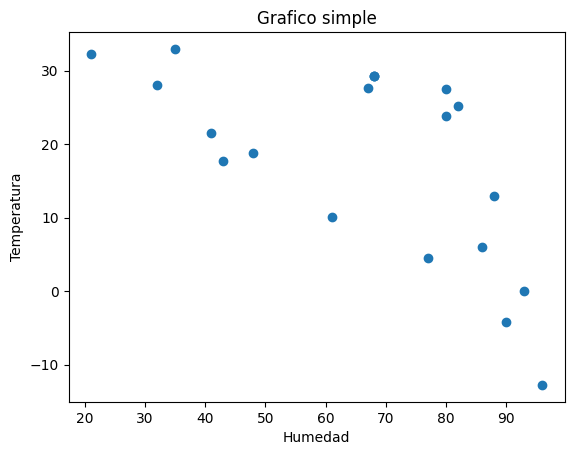

In [25]:
x=df_final["main.humidity"]
y=df_final["main.temp"]

plt.scatter(x,y)
plt.xlabel("Humedad")
plt.ylabel("Temperatura")
plt.title("Grafico simple")
plt.show()



Por esta tendencia general deque mayor humedad se asocia con menor temperatura.

# 6. Resumen

Escriba un informe breve (celda Markdown):

Describe tu proceso (solicitudes de API, limpieza de datos, análisis).

La parte mas complicada es a la hora de hacer un dataframe con los valores de diferentes paises, no entiendo porque me da error la hora de pasar el param apikey dentro de la url de la solicutd de la api.
Despues de un tiempo me da el resultado. tuve que descargar el csv y cargarlo para hacer el ejercicio.
No es la primera vez que a la hora de pasar un dataframe para un csv a la hora de descargar cree una columna: Unnamed: 0, la que se debe de borrar 

Resalte patrones interesantes.

Hay cierta relacio(no mucha) entre la humedad y la temperatura un -0.65, esto indica que a medida que una variable aumenta la otra va disminuyendo pero no tan drastico, como una correlacion de un -1

Mencione cualquier dificultad o limitación que haya encontrado.

La mayor dificultad fue a la hora de tratar los paises segun los continentes, no supe muy bien se habi que hacer 2 for para iterar, uno sobre los diferentes array de los continentes y otro for para iterar sobre cada lista del array.
Buscando vi la el metrodo isin() df1= df_final[df_final['name'].isin(paises)] que ya hace esta iteracion de existencia dentro del array


# Bonus:
## Compare los datos actuales con los pronosticados .

In [26]:
base_egipto=f"https://api.openweathermap.org/data/2.5/forecast?q=Sudafrica&units=metric&appid={api_key}"

egipto=(requests.get(base_egipto)).json()

df_hora=pd.json_normalize(
    egipto,
    record_path=['list'], #### Esto hace que se expanda el list donde se encuentra todo lo importante 
    meta=[
        ['city', 'name'],      # Extrae el nombre de la ciudad
        ['city', 'country']
        ]
    )

df_egipto=df_hora[["city.name", "main.temp"]].iloc[0:9]
df_registro=registro[["name", "main.temp"]]
df_resultato=pd.DataFrame()
df_resultato["temperatura_media"] = df_registro.iloc[0,1]-df_egipto["main.temp"]
df_resultato

,temperatura_media
0,0.66
1,3.76
2,8.20
3,9.43
4,4.70
5,-0.02
6,-2.92
7,-3.12
8,0.22


## Compute temperature differences by time of day.

In [27]:
df_hora[["dt_txt","main.temp"]].iloc[0:9]
# df_horas=df_hora[[""]]

,dt_txt,main.temp
0,2025-12-02 18:00:00,20.83
1,2025-12-02 21:00:00,17.73
2,2025-12-03 00:00:00,13.29
3,2025-12-03 03:00:00,12.06
4,2025-12-03 06:00:00,16.79
5,2025-12-03 09:00:00,21.51
6,2025-12-03 12:00:00,24.41
7,2025-12-03 15:00:00,24.61
8,2025-12-03 18:00:00,21.27


## Use geopy or a city coordinate list to automate location queries.

In [28]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='agent weather')

## La ciudad que se quiera
pais='Calle del Universo, 3, Valladolid'

location=geolocator.geocode(f'{pais}')

df_geo=pd.DataFrame(location.raw)

geo=df_geo[["display_name", "lat", "lon"]]

geo.head(1)


,display_name,lat,lon
0,"3, Calle del Universo, Los Santos, Pilarica - ...",41.6525837,-4.6985918


## Map the results on a world map using Plotly or Folium.

In [29]:
paises_por_continente = [
    "Cairo",
    "Lagos",
    "Johannesburg",
    "Toronto",
    "Tokyo",
    "Beijing",
    "Bangkok",
    "Paris",
    "Berlin",
    "Madrid",
    "Bogotá",
    "Reykjavik",
    "Moscow",
    "Lima",
    "São Paulo",
    "Mexico City",
    "Buenos Aires",
    "New Delhi"
]
resultado2=[]

for i in paises_por_continente:

    base_url_hora=f"https://api.openweathermap.org/data/2.5/weather?q={i}&units=metric"

    response2=(requests.get(base_url_hora, params={"appid":api_key})).json()

    df_fila=pd.json_normalize(response2)

    df_fila=df_fila[['name','coord.lon','coord.lat']]

    resultado2.append(df_fila)

df_final2=pd.concat(resultado2, ignore_index=True)
df_final2

,name,coord.lon,coord.lat
0,Cairo,31.2497,30.0626
1,Lagos,3.7500,6.5833
2,Johannesburg,28.0436,-26.2023
3,Toronto,-79.4163,43.7001
4,Tokyo,139.6917,35.6895
5,Beijing,116.3972,39.9075
6,Bangkok,100.5167,13.7500
7,Paris,2.3488,48.8534
8,Berlin,13.4105,52.5244
9,Madrid,-3.7026,40.4165


In [30]:
# df_final2 
mapa = folium.Map(location=[df_final2['coord.lat'].mean(), df_final2['coord.lon'].mean()])

for index, fila in df_final2.iterrows():
    folium.Marker(
        location=[fila['coord.lat'], fila['coord.lon']],
        tooltip=fila['name']
                  ).add_to(mapa)

mapa

